In [23]:
import numpy as np
import pandas as pd
df_bank = pd.read_csv('./dataset/BankCustomer.csv')
df_bank.head()

,Name,Gender,Age,City,Tenure,ProductsNo,HasCard,ActiveMember,Credit,AccountBal,Salary,Exited
0,Kan Jian,Female,40,Beijing,9,2,0,1,516,6360.66,0.0000,0
1,Xue Baochai,Male,69,Beijing,6,2,0,1,682,28605.00,0.0000,0
2,Mao Xi,Female,32,Beijing,9,1,1,1,803,10378.09,236311.0932,1
3,Zheng Nengliang,Female,37,Tianjin,0,2,1,1,778,25564.01,129909.8079,1
4,Zhi Fen,Male,55,Tianjin,4,3,1,0,547,3235.61,136976.1948,1


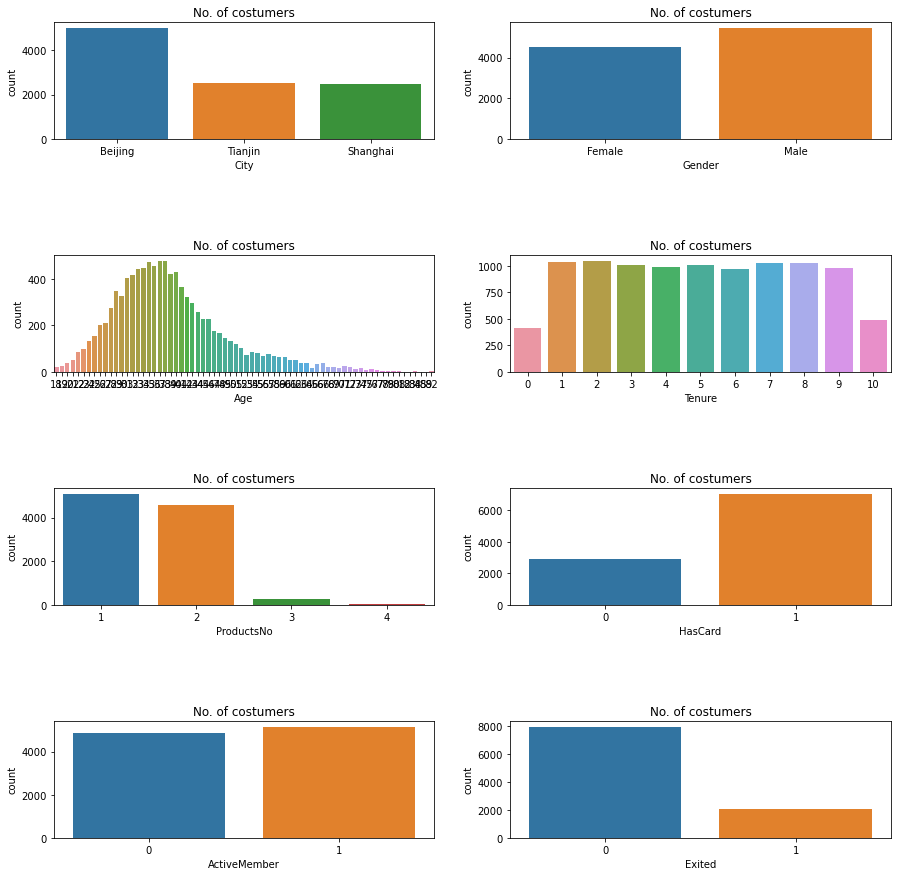

In [24]:
# 显示数据的分布情况：
import matplotlib.pyplot as plt
import seaborn as sns
features = ['City', 'Gender', 'Age', 'Tenure',
                    'ProductsNo', 'HasCard', 'ActiveMember', 'Exited']
fig = plt.subplots(figsize=(15, 15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i + 1)
    plt.subplots_adjust(hspace=1.0)
    sns.countplot(x=j, data=df_bank)
    plt.title("No. of costumers")

In [25]:
# 数据清理：
# 把二元类别文本数字化
df_bank['Gender'].replace("Female", 0, inplace = True)
df_bank['Gender'].replace("Male", 1, inplace = True)
# 显示数字类别
print("Gender unique values", df_bank['Gender'].unique())

# 把多元类别转换成多个二元哑变量，然后贴回原始数据集
d_city = pd.get_dummies(df_bank['City'], prefix="City")
df_bank = [df_bank, d_city]
df_bank = pd.concat(df_bank, axis=1)

# 构建特征和标签集合
y = df_bank['Exited']
X = df_bank.drop(['Name', 'Exited', 'City'], axis=1)
X.head()

Gender unique values [0 1]


,Gender,Age,Tenure,ProductsNo,HasCard,ActiveMember,Credit,AccountBal,Salary,City_Beijing,City_Shanghai,City_Tianjin
0,0,40,9,2,0,1,516,6360.66,0.0000,1,0,0
1,1,69,6,2,0,1,682,28605.00,0.0000,1,0,0
2,0,32,9,1,1,1,803,10378.09,236311.0932,1,0,0
3,0,37,0,2,1,1,778,25564.01,129909.8079,0,0,1
4,1,55,4,3,1,0,547,3235.61,136976.1948,0,0,1


In [26]:
# 用标准方法拆分数据集为测试集和训练集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### 5.4.2 先尝试逻辑回归算法

In [27]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
history = lr.fit(X_train, y_train)
print("逻辑回归测试集准确率 {:.2f}%".format(lr.score(X_test,y_test)*100))

逻辑回归测试集准确率 78.35%


### 5.4.3 单隐层神经网络的Keras实现

In [28]:
# 1. 用序贯模型构建网络
import keras
from keras.models import Sequential
from keras.layers import Dense
ann = Sequential()
ann.add(Dense(units=12, input_dim=12, activation='relu')) # 添加输入层
ann.add(Dense(units=24,  activation='relu'))    # 添加隐层
ann.add(Dense(units=1, activation='sigmoid'))   # 添加输出层
ann.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                312       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 493
Trainable params: 493
Non-trainable params: 0
_________________________________________________________________


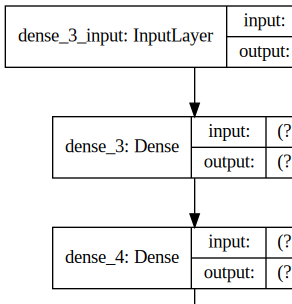

In [29]:
# 展示出神经网络的形状结构：
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(ann,show_shapes = True ).create(prog='dot', format='svg'))

In [30]:
# 编译神经网络，指定优化器，损失函数，以及评估标准
ann.compile(optimizer='adam',       # 优化器
                        loss = 'binary_crossentropy', # 损失函数
                        metrics = ['acc'])   # 评估指标

In [31]:
# 编译神经网络，指定优化器，损失函数，以及评估标准
history = ann.fit(X_train, y_train,       # 指定训练集
                        epochs=30,       # 指定训练轮次
                        batch_size=64,   # 指定数据批量
                        validation_data=(X_test, y_test))   # 指定验证集,这里为了简化模型，直接用测试集数据进行验证

Epoch 1/30
125/125 [==============================] - 0s 1ms/step - loss: 133.6657 - acc: 0.6354 - val_loss: 16.2956 - val_acc: 0.5990
Epoch 2/30
125/125 [==============================] - 0s 472us/step - loss: 17.7726 - acc: 0.6854 - val_loss: 21.5570 - val_acc: 0.7715
Epoch 3/30
125/125 [==============================] - 0s 488us/step - loss: 16.4607 - acc: 0.7030 - val_loss: 13.3437 - val_acc: 0.7850
Epoch 4/30
125/125 [==============================] - 0s 496us/step - loss: 11.7786 - acc: 0.7076 - val_loss: 5.7552 - val_acc: 0.7380
Epoch 5/30
125/125 [==============================] - 0s 488us/step - loss: 11.9522 - acc: 0.7040 - val_loss: 6.9783 - val_acc: 0.7860
Epoch 6/30
125/125 [==============================] - 0s 480us/step - loss: 17.0638 - acc: 0.6946 - val_loss: 8.3927 - val_acc: 0.7905
Epoch 7/30
125/125 [==============================] - 0s 480us/step - loss: 16.2460 - acc: 0.7092 - val_loss: 21.8749 - val_acc: 0.4985
Epoch 8/30
125/125 [==============================] 

In [32]:
 # 显示训练过程中的学习曲线
 def show_history(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss)+1)
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    acc = history.history['acc']
    val_acc = history.history['val_acc']
    plt.subplot(1, 2, 2)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

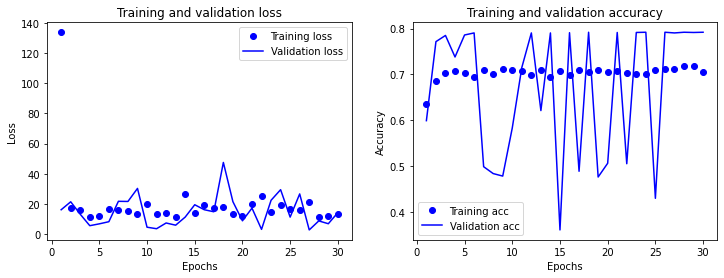

In [33]:
show_history(history)

In [34]:
y_pred = ann.predict(X_test,batch_size=10) # 预测测试集的标签
y_pred = np.round(y_pred) # 四舍五入，将分类概率值转换成0/1整数值

In [35]:
from sklearn.metrics import classification_report 
def show_report(X_test, y_test, y_pred):
    if y_test.shape != (2000, 1):
        y_test = y_test.values  # 把Panda series转换成Numpy array
        y_test = y_test.reshape(len(y_test), 1) # 转换成与y_pred相同的形状 
    print(classification_report(y_test, y_pred, labels=[0, 1]))

In [36]:
show_report(X_test, y_test, y_pred)

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1583
           1       0.57      0.01      0.02       417

    accuracy                           0.79      2000
   macro avg       0.68      0.50      0.45      2000
weighted avg       0.75      0.79      0.70      2000



In [37]:
from sklearn.metrics import confusion_matrix
def show_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.title("ANN Confusion Matrix")
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
    plt.show()

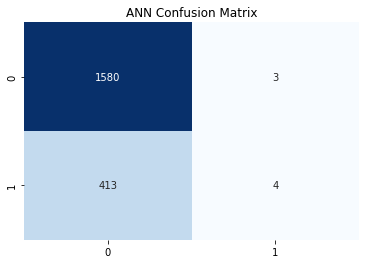

In [38]:
show_matrix(y_test, y_pred)

### 5.5.3 特征缩放的魔力

In [39]:
# mean = X_train.mean(axis=0) # 计算训练集均值
# X_train -= mean # 训练集减去训练集均值
# std = X_train.std(axis=0) # 计算训练集方差
# X_train /= std # 训练集除以训练集标准差
# X_test -= mean # 测试集减去训练集均值
# X_test /= std # 测试集减去训练集均值

In [40]:
# 直接使用StandardScaler工具
from sklearn.preprocessing import StandardScaler # 导入特征缩放器
sc = StandardScaler() # 特征缩放器
X_train = sc.fit_transform(X_train) # 拟合并应用于训练集
X_test = sc.transform (X_test) # 训练集结果应用于测试集

In [41]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression() # 逻辑回归模型
history = lr.fit(X_train, y_train)
print("逻辑回归测试集准确率：{:.2f}%".format(lr.score(X_test, y_test)*100))

逻辑回归测试集准确率：80.50%


In [42]:
# 特征工程后重新调用神经网络
# 单隐层神经网络：
history = ann.fit(X_train, y_train,
                                epochs = 30,
                                batch_size = 64,
                                validation_data = (X_test, y_test))
y_pred = ann.predict(X_test, batch_size = 10)   # 预测测试集的标签
y_pred = np.round(y_pred)   # 将分类概率值转换成0/1整数值

Epoch 1/30
125/125 [==============================] - 0s 1ms/step - loss: 0.4615 - acc: 0.7965 - val_loss: 0.4372 - val_acc: 0.8120
Epoch 2/30
125/125 [==============================] - 0s 712us/step - loss: 0.4269 - acc: 0.8133 - val_loss: 0.4232 - val_acc: 0.8155
Epoch 3/30
125/125 [==============================] - 0s 728us/step - loss: 0.4156 - acc: 0.8196 - val_loss: 0.4175 - val_acc: 0.8175
Epoch 4/30
125/125 [==============================] - 0s 712us/step - loss: 0.4056 - acc: 0.8256 - val_loss: 0.4073 - val_acc: 0.8260
Epoch 5/30
125/125 [==============================] - 0s 712us/step - loss: 0.3934 - acc: 0.8311 - val_loss: 0.3912 - val_acc: 0.8340
Epoch 6/30
125/125 [==============================] - 0s 696us/step - loss: 0.3805 - acc: 0.8391 - val_loss: 0.3801 - val_acc: 0.8460
Epoch 7/30
125/125 [==============================] - 0s 720us/step - loss: 0.3707 - acc: 0.8441 - val_loss: 0.3752 - val_acc: 0.8460
Epoch 8/30
125/125 [==============================] - 0s 712us/s

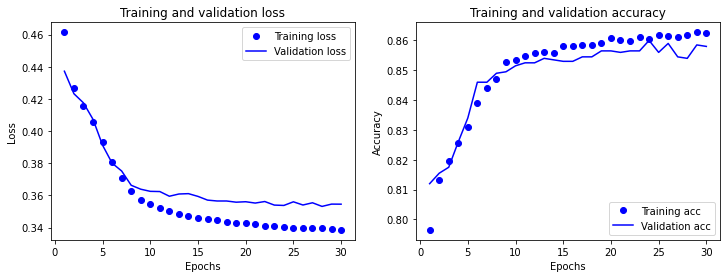

In [43]:
show_history(history)

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1583
           1       0.77      0.46      0.57       417

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.85      0.86      0.84      2000



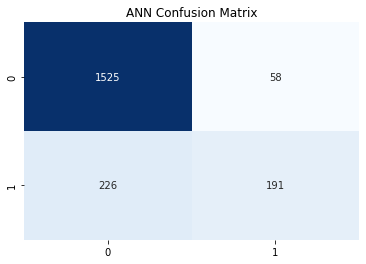

In [44]:
show_report(X_test, y_test, y_pred)
show_matrix(y_test, y_pred)

深层神经网络

In [53]:
ann = Sequential() # 创建一个序贯ANN模型
ann.add(Dense(units=12, input_dim=12, activation = 'relu')) # 添加输入层
ann.add(Dense(units=24, activation = 'relu')) # 添加隐层
ann.add(Dense(units=48, activation = 'relu')) # 添加隐层
ann.add(Dense(units=96, activation = 'relu')) # 添加隐层
ann.add(Dense(units=192, activation = 'relu')) # 添加隐层
ann.add(Dense(units=1, activation = 'sigmoid')) # 添加输出层
# 编译神经网络，指定优化器，损失函数，以及评估指标
ann.compile(optimizer = 'RMSprop', # 优化器
            loss = 'binary_crossentropy', # 损失函数
            metrics = ['acc']) # 评估指标
history = ann.fit(X_train, y_train, # 指定训练集
                  epochs=30,        # 指定训练的轮次
                  batch_size=64,    # 指定数据批量
                  validation_data=(X_test, y_test)) # 指定验证集
y_pred = ann.predict(X_test,batch_size=10) # 预测测试集的标签
y_pred = np.round(y_pred) # 将分类概率值转换成0/1整数值

Epoch 1/30
125/125 [==============================] - 1s 5ms/step - loss: 0.4810 - acc: 0.7941 - val_loss: 0.4647 - val_acc: 0.7935
Epoch 2/30
125/125 [==============================] - 0s 728us/step - loss: 0.4377 - acc: 0.8075 - val_loss: 0.4265 - val_acc: 0.8160
Epoch 3/30
125/125 [==============================] - 0s 744us/step - loss: 0.4033 - acc: 0.8255 - val_loss: 0.4025 - val_acc: 0.8270
Epoch 4/30
125/125 [==============================] - 0s 736us/step - loss: 0.3841 - acc: 0.8351 - val_loss: 0.3928 - val_acc: 0.8300
Epoch 5/30
125/125 [==============================] - 0s 752us/step - loss: 0.3720 - acc: 0.8421 - val_loss: 0.3865 - val_acc: 0.8475
Epoch 6/30
125/125 [==============================] - 0s 752us/step - loss: 0.3639 - acc: 0.8456 - val_loss: 0.3910 - val_acc: 0.8425
Epoch 7/30
125/125 [==============================] - 0s 896us/step - loss: 0.3567 - acc: 0.8512 - val_loss: 0.3848 - val_acc: 0.8410
Epoch 8/30
125/125 [==============================] - 0s 904us/s

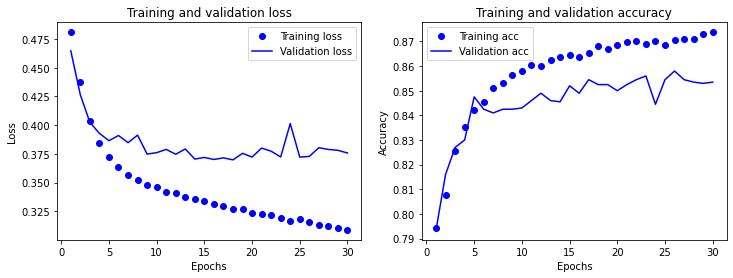

In [54]:
show_history(history)

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1583
           1       0.71      0.50      0.59       417

    accuracy                           0.85      2000
   macro avg       0.79      0.72      0.75      2000
weighted avg       0.84      0.85      0.84      2000



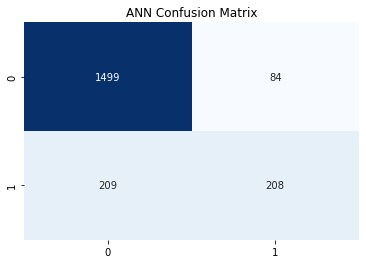

In [55]:
show_report(X_test, y_test, y_pred)
show_matrix(y_test, y_pred)

尝试不同优化器

In [57]:
ann = Sequential() # 创建一个序贯ANN模型
ann.add(Dense(units=12, input_dim=12, activation = 'relu')) # 添加输入层
ann.add(Dense(units=24, activation = 'relu')) # 添加隐层
ann.add(Dense(units=48, activation = 'relu')) # 添加隐层
ann.add(Dense(units=96, activation = 'relu')) # 添加隐层
ann.add(Dense(units=192, activation = 'relu')) # 添加隐层
ann.add(Dense(units=1, activation = 'sigmoid')) # 添加输出层
# 编译神经网络，指定优化器，损失函数，以及评估标准
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
history = ann.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_test, y_test))
y_pred = ann.predict(X_test,batch_size=10) # 预测测试集的标签
y_pred = np.round(y_pred) # 将分类概率值转换成0/1整数值

Epoch 1/30
125/125 [==============================] - 0s 1ms/step - loss: 0.4884 - acc: 0.7899 - val_loss: 0.4349 - val_acc: 0.8135
Epoch 2/30
125/125 [==============================] - 0s 736us/step - loss: 0.4138 - acc: 0.8226 - val_loss: 0.4037 - val_acc: 0.8355
Epoch 3/30
125/125 [==============================] - 0s 872us/step - loss: 0.3844 - acc: 0.8400 - val_loss: 0.3829 - val_acc: 0.8405
Epoch 4/30
125/125 [==============================] - 0s 856us/step - loss: 0.3628 - acc: 0.8490 - val_loss: 0.3730 - val_acc: 0.8520
Epoch 5/30
125/125 [==============================] - 0s 792us/step - loss: 0.3476 - acc: 0.8584 - val_loss: 0.3607 - val_acc: 0.8510
Epoch 6/30
125/125 [==============================] - 0s 760us/step - loss: 0.3404 - acc: 0.8585 - val_loss: 0.3586 - val_acc: 0.8525
Epoch 7/30
125/125 [==============================] - 0s 760us/step - loss: 0.3367 - acc: 0.8639 - val_loss: 0.3589 - val_acc: 0.8530
Epoch 8/30
125/125 [==============================] - 0s 800us/s

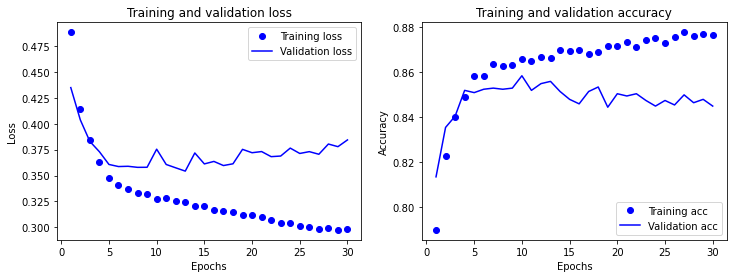

In [58]:
show_history(history)

              precision    recall  f1-score   support

           0       0.87      0.94      0.91      1583
           1       0.68      0.49      0.57       417

    accuracy                           0.84      2000
   macro avg       0.78      0.71      0.74      2000
weighted avg       0.83      0.84      0.84      2000



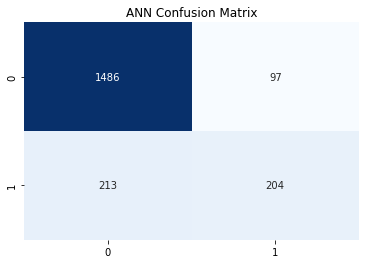

In [59]:
show_report(X_test, y_test, y_pred)
show_matrix(y_test, y_pred)

添加Dropout层

In [45]:
# from keras.layers import Dropout # 导入Dropout
# ann = Sequential() # 创建一个序贯ANN模型
# ann.add(Dense(units=12, input_dim=12, activation = 'relu')) # 添加输入层
# ann.add(Dense(units=24, activation = 'relu')) # 添加隐层
# ann.add(Dropout(0.5)) # 添加Dropout
# ann.add(Dense(units=48, activation = 'relu')) # 添加隐层
# ann.add(Dropout(0.5)) # 添加Dropout
# ann.add(Dense(units=96, activation = 'relu')) # 添加隐层
# ann.add(Dropout(0.5)) # 添加Dropout
# ann.add(Dense(units=192, activation = 'relu')) # 添加隐层
# ann.add(Dropout(0.5)) # 添加Dropout
# ann.add(Dense(units=1, activation = 'sigmoid')) # 添加输出层
# # 编译神经网络，指定优化器，损失函数，以及评估标准
# ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc']) 
# history = ann.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_test, y_test))
# y_pred = ann.predict(X_test,batch_size=10) # 预测测试集的标签
# y_pred = np.round(y_pred) # 将分类概率值转换成0/1整数值

In [50]:
from keras.layers import Dropout # 导入Dropout
ann = Sequential()    # 创建一个序贯ANN模型
ann.add(Dense(units=12, input_dim=12, activation='relu'))   # 添加输入层
ann.add(Dense(units=24, activation='relu'))   # 添加隐层
ann.add(Dropout(0.5))   # 添加Dropout
ann.add(Dense(units=48, activation='relu'))   # 添加隐层
ann.add(Dropout(0.5))   # 添加Dropout
ann.add(Dense(units=96, activation='relu'))   # 添加隐层
ann.add(Dropout(0.5))   # 添加Dropout
ann.add(Dense(units=192, activation='relu'))   # 添加隐层
ann.add(Dropout(0.5))   # 添加Dropout
ann.add(Dense(units=1, activation = 'sigmoid')) # 添加输出层
ann.compile(optimizer = 'adam', # 优化器
                        loss = 'binary_crossentropy',    # 损失函数
                        metrics=['acc']) # 评估指标
history = ann.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_test, y_test))
y_pred = ann.predict(X_test, batch_size=10)  # 预测测试集的标签
y_pred = np.round(y_pred) #将分类概率值转换成0/1整数值

Epoch 1/30
125/125 [==============================] - 0s 2ms/step - loss: 0.5291 - acc: 0.7941 - val_loss: 0.5005 - val_acc: 0.7915
Epoch 2/30
125/125 [==============================] - 0s 1ms/step - loss: 0.4901 - acc: 0.7975 - val_loss: 0.4825 - val_acc: 0.7915
Epoch 3/30
125/125 [==============================] - 0s 1ms/step - loss: 0.4734 - acc: 0.7975 - val_loss: 0.4628 - val_acc: 0.7915
Epoch 4/30
125/125 [==============================] - 0s 992us/step - loss: 0.4637 - acc: 0.7975 - val_loss: 0.4582 - val_acc: 0.7915
Epoch 5/30
125/125 [==============================] - 0s 1ms/step - loss: 0.4570 - acc: 0.7976 - val_loss: 0.4576 - val_acc: 0.7915
Epoch 6/30
125/125 [==============================] - 0s 1ms/step - loss: 0.4509 - acc: 0.7977 - val_loss: 0.4609 - val_acc: 0.7915
Epoch 7/30
125/125 [==============================] - 0s 1ms/step - loss: 0.4483 - acc: 0.7994 - val_loss: 0.4626 - val_acc: 0.7950
Epoch 8/30
125/125 [==============================] - 0s 1ms/step - loss: 

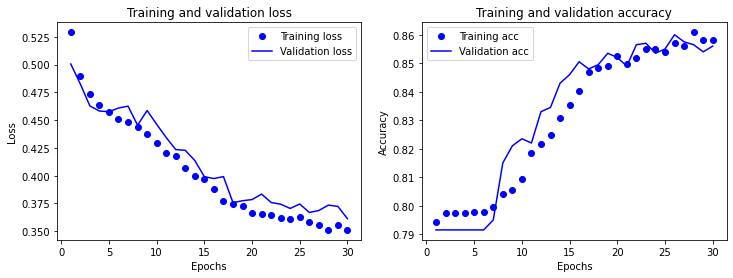

In [51]:
show_history(history)

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1583
           1       0.73      0.49      0.59       417

    accuracy                           0.86      2000
   macro avg       0.80      0.72      0.75      2000
weighted avg       0.85      0.86      0.84      2000



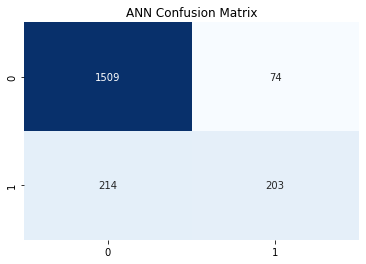

In [52]:
show_report(X_test, y_test, y_pred)
show_matrix(y_test, y_pred)